In [2]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [3]:
f = lambda x, fw: np.sin(2*np.pi*fw*x)
N = 2048

def sinPlot(fw, Ts):
    # continous function plot
    X = np.linspace(*[0,10], 400)
    Y = np.fromiter((f(x, fw) for x in X), np.float, 400)
    plt.plot(X, Y)
    
    if Ts > 0:
        # sampled function scatter plot
        x = np.arange(0, 10.001, Ts)
        y = np.vectorize(f)(x, fw)
        for n in range(len(x)):
            plt.plot([x[n], x[n]], [0, y[n]], 'b-')
        plt.plot(x, y, 'bo')

    plt.xlabel('Zeit')
    plt.ylabel('Amplitude')
    plt.title('sin(fw) Funktion mit fs abgetastet')
    
    return X

def spectrumPlot(fw, fs, s):
    if fs != 0:
        xf = np.linspace(s[0]*fs, s[1]*fs, int((s[1]-s[0])*N))
        
        # fs/2 labels: mirror spectra
        for n in np.arange(round(s[0]+.5), s[1], .5):
            fsPos = n-s[0]
            fsPos= int(fsPos *N)-1
            if int(n) == n:
                # draw ticks
                plt.text(xf[fsPos], .01, str(n)+"*fs",color = 'black')
                plt.plot([xf[fsPos], xf[fsPos]], [0, .01], "-k")
                
                # plot frequencies for sin
                pos = [(-fw/fs+n*fs/fs-s[0]), (fw/fs+n*fs/fs-s[0])]
                pos = [int(x * N)-1 for x in pos]
                pos = [p for p in pos if p >= 0 and p < len(xf)]

                plt.plot(xf[pos], np.repeat(0.5, len(pos)), 'or')
                for p in pos:
                    plt.plot([xf[p], xf[fsPos]], [0.5, 0], '--k')
            else:
                plt.text(xf[fsPos], .03, str(n)+"*fs" ,color = 'red')
                plt.plot([xf[fsPos], xf[fsPos]], [0, .02], "-r")
                if not (fs > 2*fw):
                    plt.plot([xf[fsPos], xf[fsPos]], [0, .4], "--r")
    else:
        xf = np.linspace(s[0]*fw, s[1]*fw, int((s[1]-s[0])*N))
        fs = fw
        
    # plot frequencies for sin
    pos = [(-fw/fs-s[0]), (fw/fs-s[0])]
    pos = [int(x * N)-1 for x in pos]
    pos = [p for p in pos if p >= 0 and p < len(xf)]
    
    yf = np.zeros((len(xf),))
    yf[pos] = .5
    plt.plot(xf, yf, 'ob')
    for n in pos:
        plt.plot([xf[n], xf[n]], [0, yf[n]], 'b-')
         
    plt.ylim([0,0.6])
    plt.xlabel('Frequenz')
    plt.ylabel('Betrag | F(f) |')
    plt.title('Betragsspektrum für sin(fw) bei Abtastfrequenz fs')
    
def plotFunc(Tw, Ts):
    fw = 1/Tw
    
    print('fw: '+str(fw))
    if Ts > 0:
        fs = 1/Ts
        print('fs: '+str(fs))
    else:
        fs = 0
    
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    X = sinPlot(fw, Ts)
    
    #fs > 2 * fw
    if Ts > 0 and not (1/Ts > 2/Tw):
        # plot optional function, when sampling theorem is not met
        AliasingFrequ = fw - fs
        print("\x1b[31mNOK: fs <= 2 * fw: "+str(AliasingFrequ))
        Y = np.fromiter((f(x, AliasingFrequ) for x in X), np.float, 400)
        plt.plot(X, Y)
    elif Ts > 0:
        print("OK:  fs > 2 * fw")
    
    plt.subplot(1, 2, 2)
    spectrumPlot(fw, fs, [-1.5, 2.5])

fw: 0.3333333333333333
fs: 0.5
NOK: fs <= 2 * fw: -0.16666666666666669


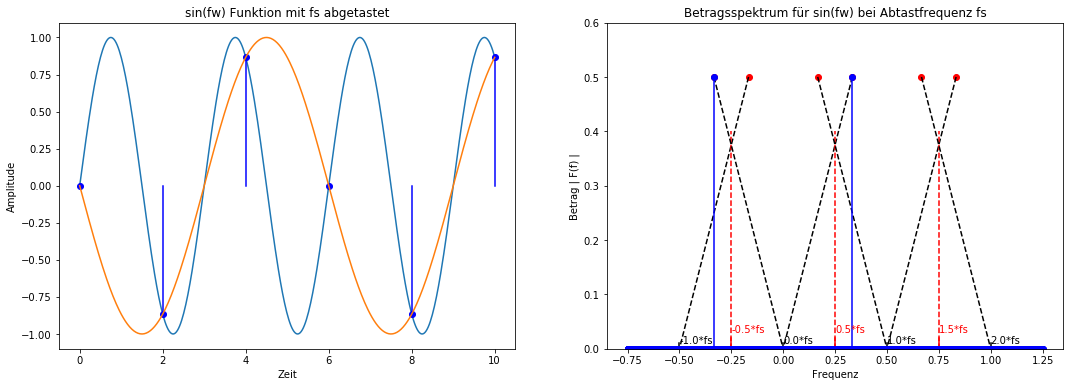

In [4]:
plotFunc(3,2)